In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import joblib

In [23]:

X_train = np.load("training_gaze_data.npy", allow_pickle=True)
y_train = np.load("training_target_data.npy", allow_pickle=True)
 
X_test = np.load("validation_gaze_data.npy", allow_pickle=True)
y_test = np.load("validation_target_data.npy", allow_pickle=True)

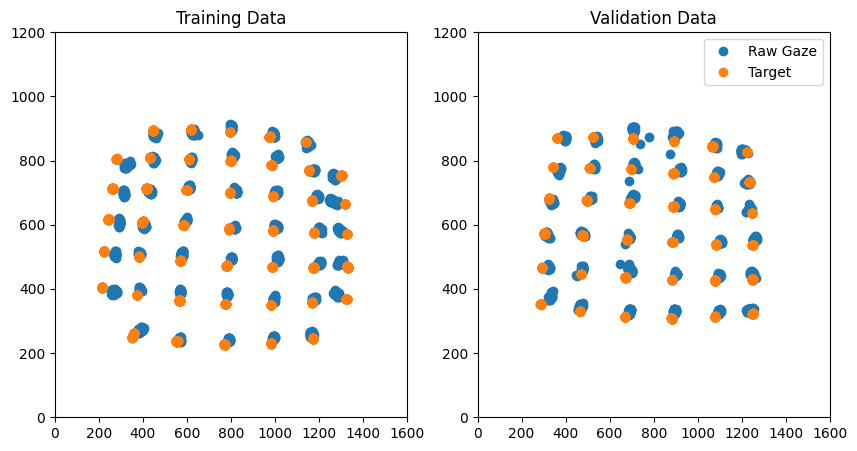

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].plot(X_train[:, 0], X_train[:, 1], 'o', label="Raw Gaze")
ax[0].plot(y_train[:, 0], y_train[:, 1], 'o', label="Target")
ax[0].set_title("Training Data")
ax[0].set_xlim([0, 1600])
ax[0].set_ylim([0, 1200])

ax[1].plot(X_test[:, 0], X_test[:, 1], 'o', label="Raw Gaze")
ax[1].plot(y_test[:, 0], y_test[:, 1], 'o', label="Target")
ax[1].set_title("Validation Data")
ax[1].set_xlim([0, 1600])
ax[1].set_ylim([0, 1200])
plt.legend()

In [25]:
predictor = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=3, include_bias=True)),
        ("linear", LinearRegression()),
    ]
)

predictor.fit(X_train, y_train)
joblib.dump(predictor, "predictor.pkl")

y_pred = predictor.predict(X_test)
orig = np.linalg.norm(X_test - y_test, axis=1).mean()
corrected = np.linalg.norm(y_pred - y_test, axis=1).mean()
print(f"Original error: {orig:.2f}")
print(f"Corrected error: {corrected:.2f}")

Original error: 24.13
Corrected error: 14.36
